<a href="https://colab.research.google.com/github/abrishwon21/ML_in_Python/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_wine
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
dataset=load_wine()

In [4]:
df_wine =pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_wine['target']=dataset['target']
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(df_wine.loc[:,'alcohol':'proline'],df_wine.loc[:,'target'],test_size=0.30,random_state=1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
fi=model.feature_importances_
fi

array([0.1160194 , 0.02020172, 0.04352219, 0.04073666, 0.04931669,
       0.04744608, 0.18837963, 0.0042408 , 0.0380158 , 0.11334908,
       0.07617546, 0.09912001, 0.16347647])

<BarContainer object of 13 artists>

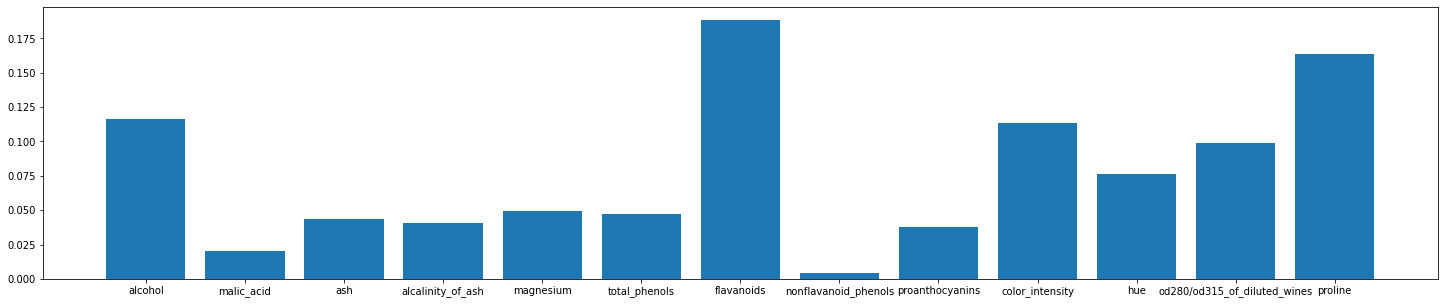

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.bar(dataset['feature_names'],fi)

In [11]:
trainpredicted=model.predict(xtrain)
testpredict=model.predict(xtest)
acc=accuracy_score(ytrain,trainpredicted)
acTest=accuracy_score(ytest,testpredict)

In [12]:
print("train accuracy ",acc)
print("test accuracy ",acTest)

train accuracy  1.0
test accuracy  0.9814814814814815


In [13]:
cm = confusion_matrix(ytest,testpredict)
cm

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]])

In [15]:
#now let's use gridsearchcv
param={'n_estimators':[100,150,200,250,300,350,400,450,500,550,600]}
opmodel=GridSearchCV(model,param,cv=10)
opmodel.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              rando

In [19]:
opmodel.best_params_

{'n_estimators': 150}

In [20]:
opmodel.best_score_

0.9833333333333332

In [21]:
opmodel.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
opmodel.best_index_

1

In [23]:
opmodel.cv_results_

{'mean_fit_time': array([0.12501788, 0.18539393, 0.24667289, 0.31439648, 0.36882157,
        0.42973497, 0.49178052, 0.55399544, 0.62209105, 0.67543423,
        0.73811879]),
 'mean_score_time': array([0.00811806, 0.01162241, 0.01472204, 0.0183593 , 0.02135298,
        0.02530918, 0.02811847, 0.03158309, 0.03469534, 0.03814821,
        0.0418828 ]),
 'mean_test_score': array([0.97564103, 0.98333333, 0.97564103, 0.97564103, 0.97564103,
        0.98333333, 0.98333333, 0.97564103, 0.98333333, 0.98333333,
        0.97564103]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250},
  {'n_estimators': 300},
  {'n_estimators': 350},
  {'n_estimators': 400},
  {'n_estimators':

In [24]:
pv=opmodel.predict(xtest)

In [25]:
print("The new Accuracy is ",accuracy_score(ytest,pv))

The new Accuracy is  0.9814814814814815
